# STAT 404 Project

## Colour-Change Response Task Analysis

In [1]:
library(dplyr, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(readr, quietly = TRUE)
library(tidyverse, quietly = TRUE)
library(MASS, quietly = TRUE)
library(car, quietly = TRUE)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode




In [2]:
data <- read_csv("reaction_time_data.csv", skip = 7)
colnames(data) <- c("Lighting", "Hand_Used", "Visual_Distraction", "Auditory_Distraction", 
                    "trial_1", "trial_2", "trial_3", "trial_4", "trial_5", "average_time")
head(data)
# tail(data)
# glimpse(data)
summary(data)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
Rows: 36 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ...1
dbl (9): ...2, ...3, ...4, Trial 1, Trial 2, Trial 3, Trial 4, Trial 5, Average

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Lighting,Hand_Used,Visual_Distraction,Auditory_Distraction,trial_1,trial_2,trial_3,trial_4,trial_5,average_time
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dim,0,0,0,248,214,215,298,241,243.2
Dim,0,0,-1,300,274,245,245,263,265.4
Dim,0,0,1,312,256,223,323,268,276.4
Dim,0,1,0,255,257,258,296,264,266.0
Dim,0,1,-1,291,236,215,271,260,254.6
Dim,0,1,1,348,244,206,320,266,276.8


   Lighting           Hand_Used   Visual_Distraction Auditory_Distraction
 Length:36          Min.   :0.0   Min.   :0.0        Min.   :-1          
 Class :character   1st Qu.:0.0   1st Qu.:0.0        1st Qu.:-1          
 Mode  :character   Median :0.5   Median :0.5        Median : 0          
                    Mean   :0.5   Mean   :0.5        Mean   : 0          
                    3rd Qu.:1.0   3rd Qu.:1.0        3rd Qu.: 1          
                    Max.   :1.0   Max.   :1.0        Max.   : 1          
    trial_1         trial_2         trial_3         trial_4     
 Min.   :234.0   Min.   :208.0   Min.   :206.0   Min.   :217.0  
 1st Qu.:265.0   1st Qu.:253.8   1st Qu.:241.2   1st Qu.:254.0  
 Median :287.0   Median :267.0   Median :255.0   Median :271.5  
 Mean   :288.1   Mean   :276.1   Mean   :262.5   Mean   :278.9  
 3rd Qu.:313.0   3rd Qu.:299.5   3rd Qu.:286.5   3rd Qu.:298.8  
 Max.   :348.0   Max.   :369.0   Max.   :354.0   Max.   :382.0  
    trial_5       average_t

### Summary of Useful Data

In [3]:
options(digits = 4)

# Average response time for each level of Hand Used
average_hand_used <- data |>
  group_by(Hand_Used) |>
  summarise(mean_reaction_time = mean(average_time, na.rm = TRUE))

print("Average reaction time for each hand used:")
print(average_hand_used)

# Average response time for each level of Visual Distraction
average_visual_distraction <- data |>
  group_by(Visual_Distraction) |>
  summarise(mean_reaction_time = mean(average_time, na.rm = TRUE))

print("Average reaction time for each visual distraction level:")
print(average_visual_distraction)

# Average response time for each level of Auditory Distraction
average_auditory_distraction <- data |>
  group_by(Auditory_Distraction) |>
  summarise(mean_reaction_time = mean(average_time, na.rm = TRUE))

print("Average reaction time for each auditory distraction level:")
print(average_auditory_distraction)


[1] "Average reaction time for each hand used:"
# A tibble: 2 × 2
  Hand_Used mean_reaction_time
      <dbl>              <dbl>
1         0               278.
2         1               273.
[1] "Average reaction time for each visual distraction level:"
# A tibble: 2 × 2
  Visual_Distraction mean_reaction_time
               <dbl>              <dbl>
1                  0               269.
2                  1               281.
[1] "Average reaction time for each auditory distraction level:"
# A tibble: 3 × 2
  Auditory_Distraction mean_reaction_time
                 <dbl>              <dbl>
1                   -1               276.
2                    0               269.
3                    1               281.


### Fitting the ANOVA Model

In [4]:
data <- data |>
  mutate(
    Hand_Used = as.factor(Hand_Used),
    Visual_Distraction = as.factor(Visual_Distraction),
    Auditory_Distraction = as.factor(Auditory_Distraction)
  )

anova_model <- aov(average_time ~ Lighting + Hand_Used * Visual_Distraction * Auditory_Distraction, data = data)
summary(anova_model)

                                                  Df Sum Sq Mean Sq F value
Lighting                                           2   8175    4087   33.46
Hand_Used                                          1    265     265    2.17
Visual_Distraction                                 1   1344    1344   11.01
Auditory_Distraction                               2    853     427    3.49
Hand_Used:Visual_Distraction                       1     26      26    0.21
Hand_Used:Auditory_Distraction                     2    184      92    0.75
Visual_Distraction:Auditory_Distraction            2     93      46    0.38
Hand_Used:Visual_Distraction:Auditory_Distraction  2    118      59    0.48
Residuals                                         22   2687     122        
                                                   Pr(>F)    
Lighting                                          2.1e-07 ***
Hand_Used                                          0.1552    
Visual_Distraction                                 0.0

### Model Checking

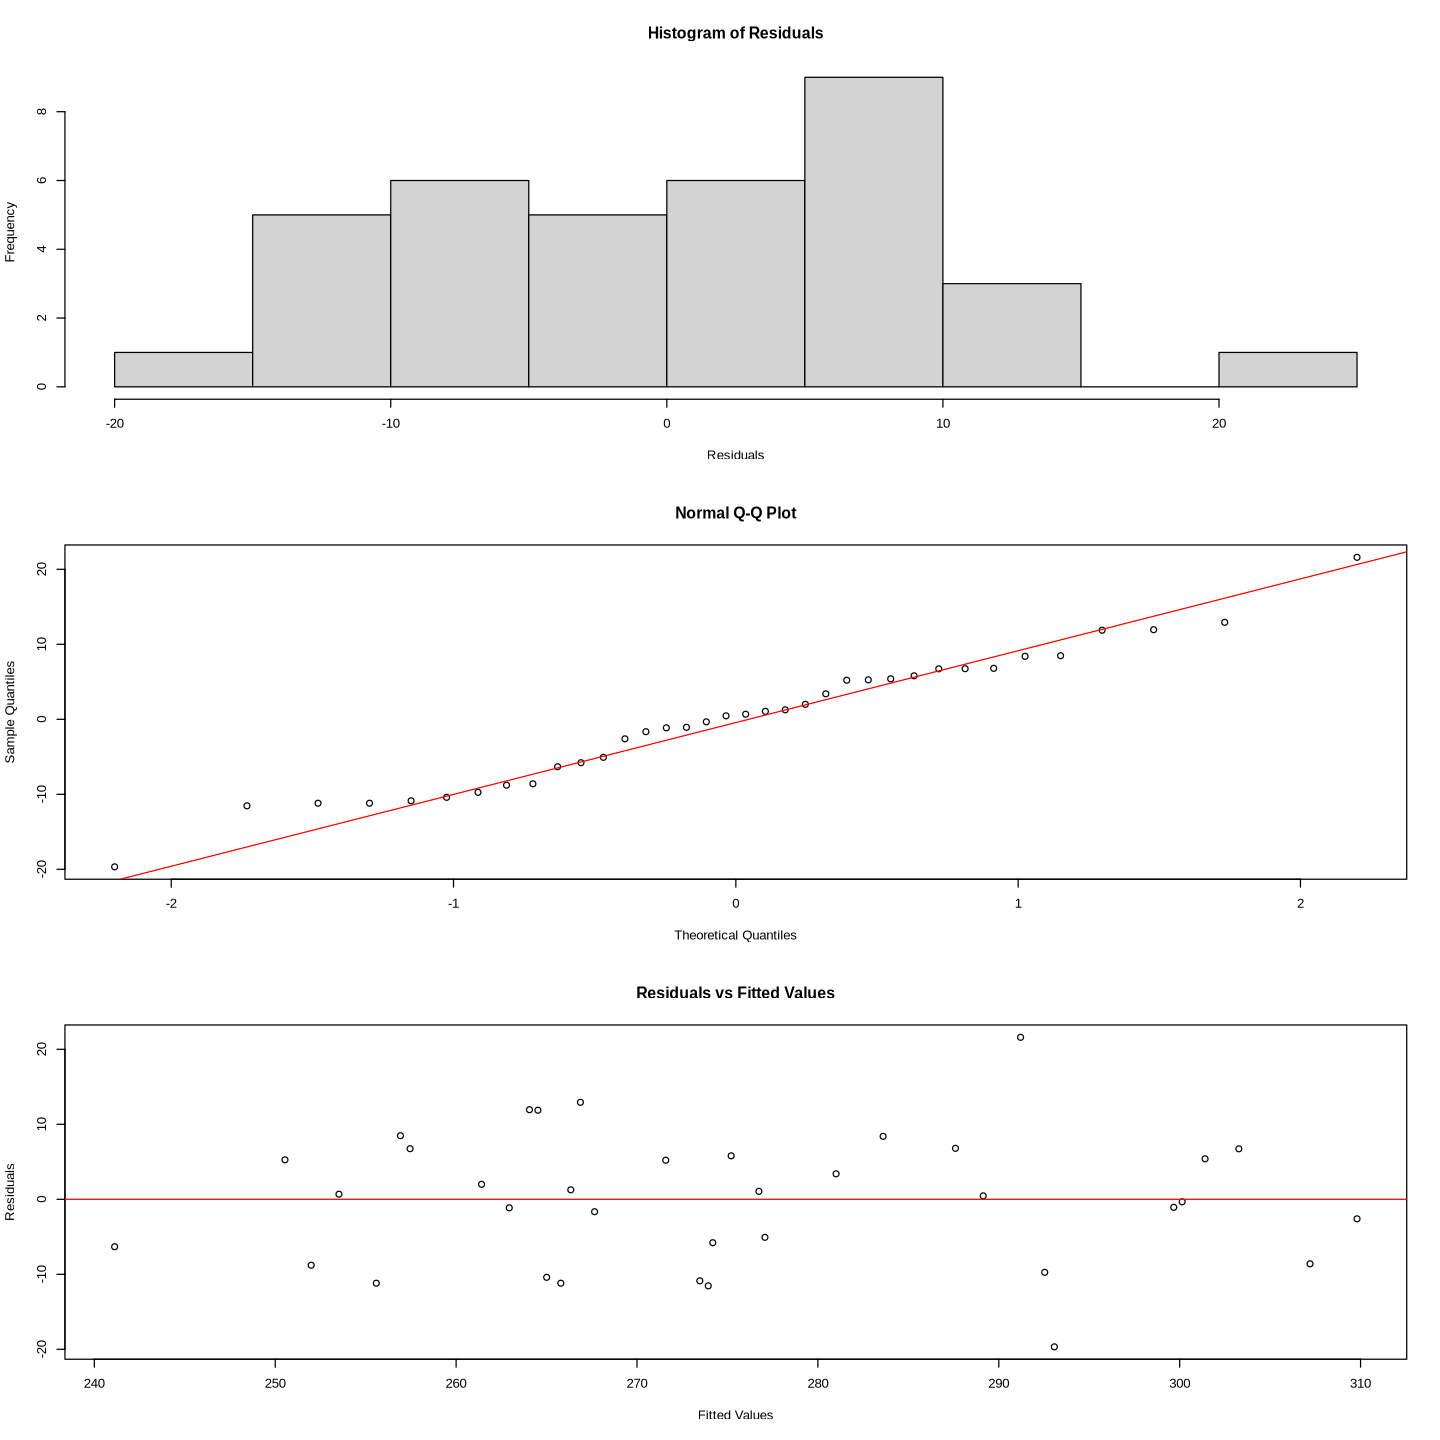

In [5]:
par(mfrow = c(3, 1))
options(repr.plot.width = 12, repr.plot.height = 12)

residuals <- residuals(anova_model)

# Histogram of residuals
hist(residuals, 
     breaks = 10, 
     main = "Histogram of Residuals", 
     xlab = "Residuals")

# Q-Q plot
qqnorm(residuals)
qqline(residuals, col = "red")

# Residual Plot (fitted values against residuals)
plot(fitted(anova_model), residuals, 
     xlab = "Fitted Values", ylab = "Residuals", 
     main = "Residuals vs Fitted Values")
abline(h = 0, col = "red")

### Box-Cox Plot check Transformations

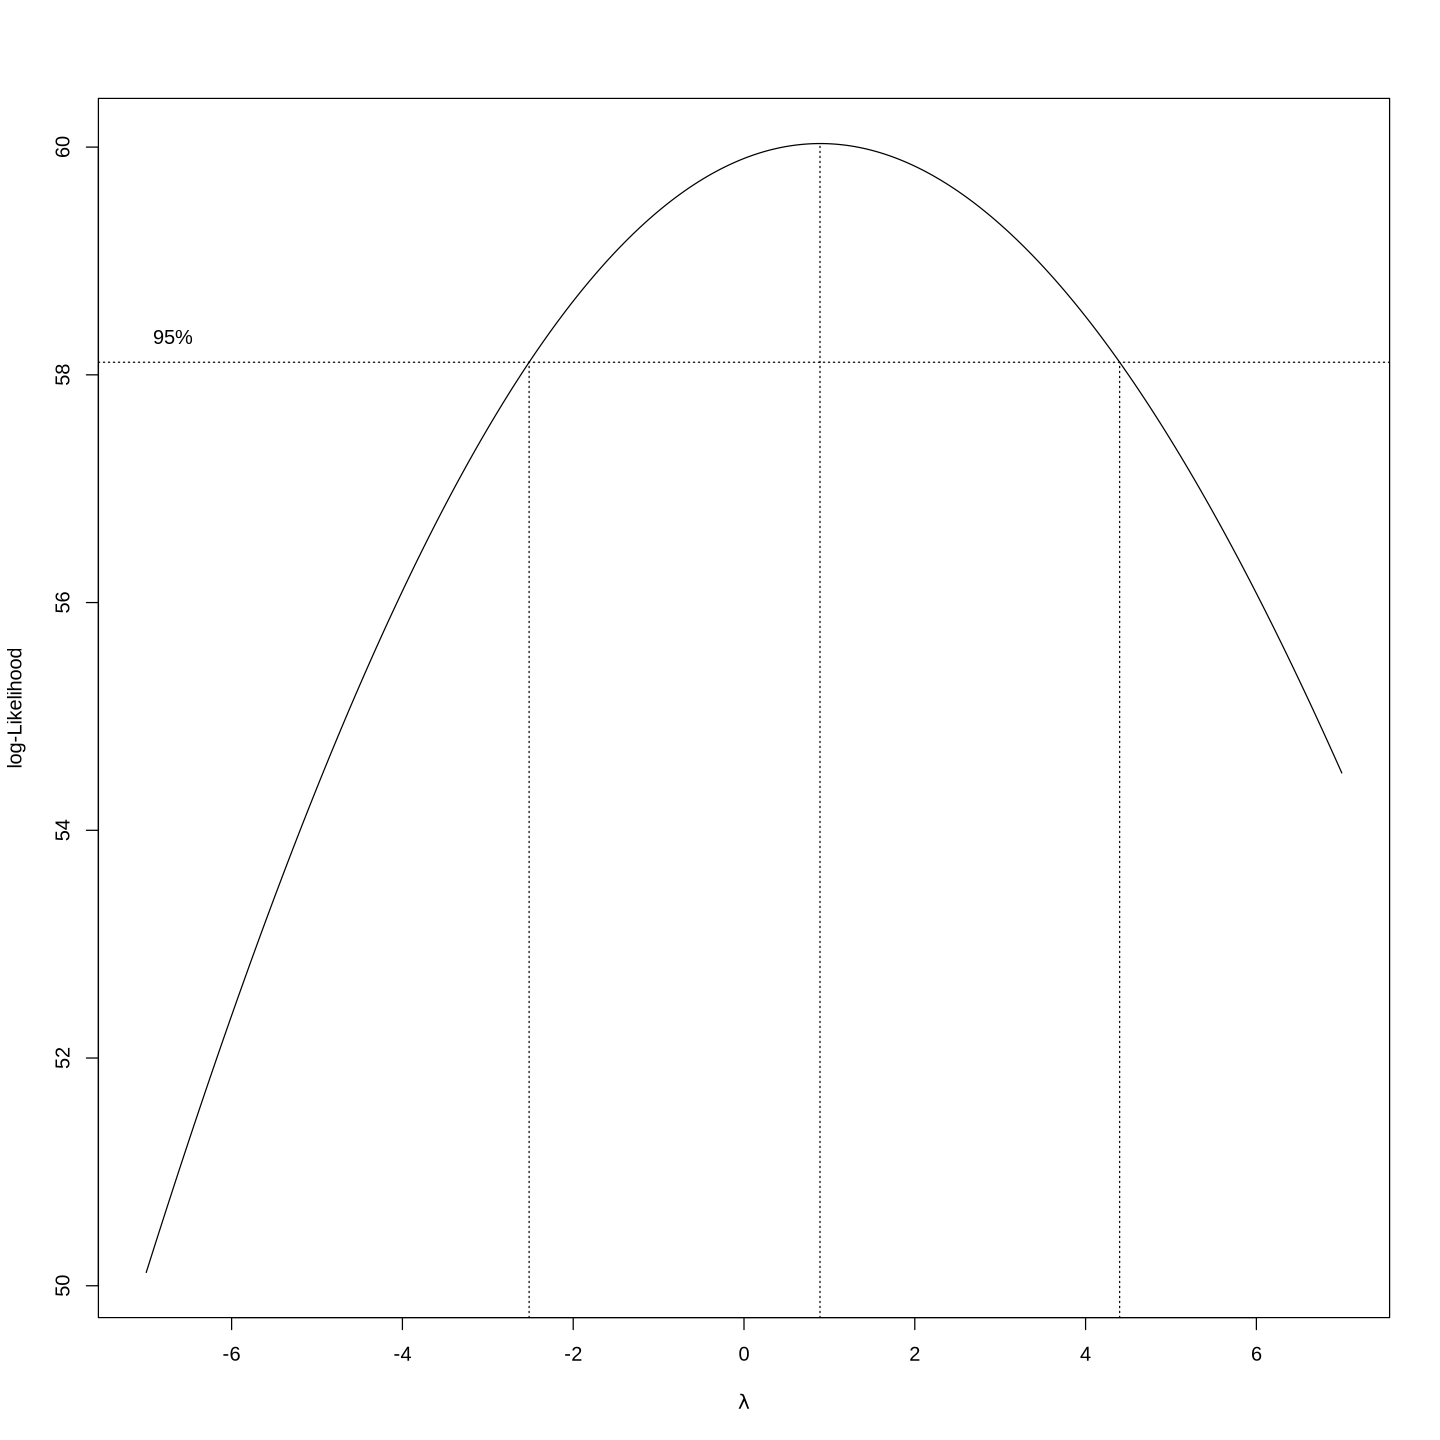

In [6]:
boxcox(anova_model, lambda = seq(-7, 7, 0.01))

### Interaction Plots

In [7]:
par("mar")

[1] 5.1 4.1 4.1 2.1

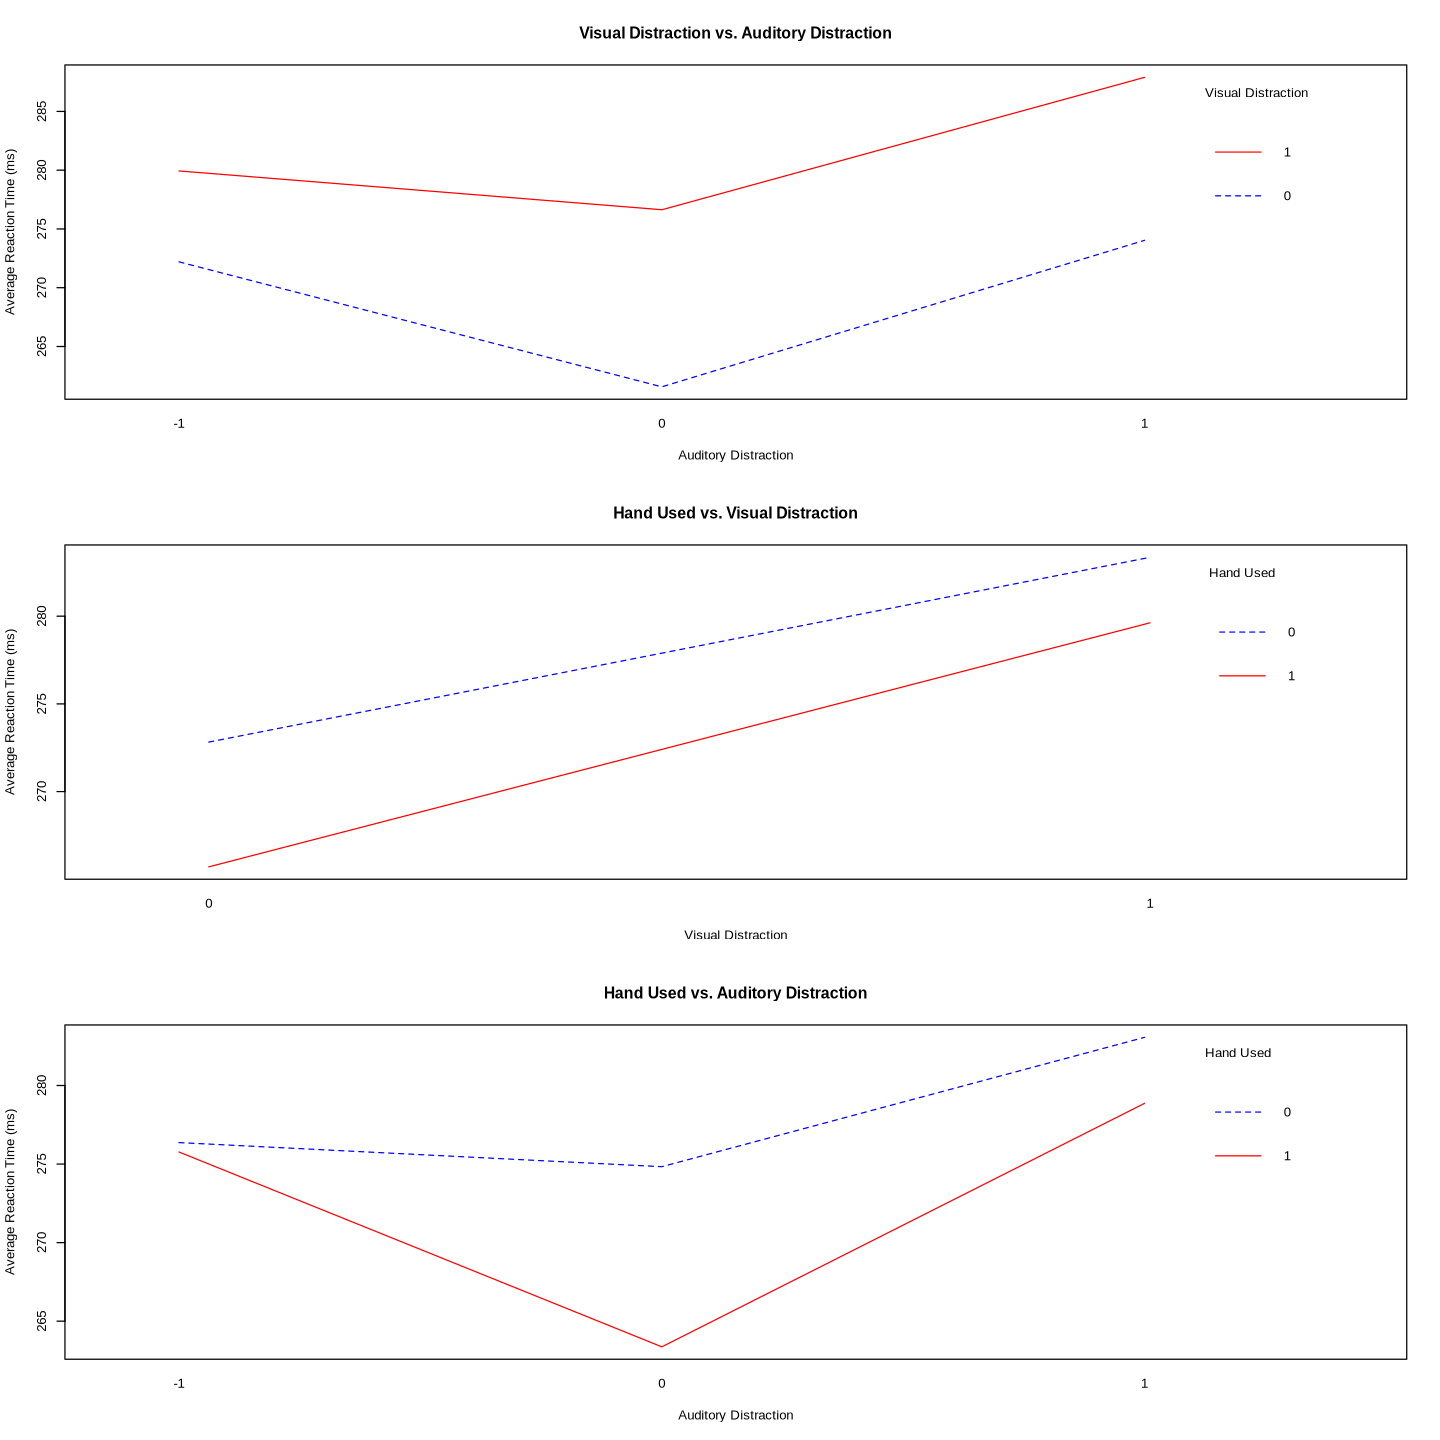

In [8]:
par(mfrow = c(3, 1))
# par(mar = c(5.1, 4.1, 4.1, 7))

interaction.plot(
  data$Auditory_Distraction, 
  data$Visual_Distraction, 
  data$average_time,
  col = c("blue", "red"),
  trace.label = "Visual Distraction",
  xlab = "Auditory Distraction", 
  ylab = "Average Reaction Time (ms)",
  main = "Visual Distraction vs. Auditory Distraction")

interaction.plot(
  data$Visual_Distraction, 
  data$Hand_Used, 
  data$average_time,
  col = c("blue", "red"),
  trace.label = "Hand Used",
  xlab = "Visual Distraction", 
  ylab = "Average Reaction Time (ms)",
  main = "Hand Used vs. Visual Distraction")

interaction.plot(
  data$Auditory_Distraction, 
  data$Hand_Used, 
  data$average_time,
  col = c("blue", "red"),
  trace.label = "Hand Used",
  xlab = "Auditory Distraction", 
  ylab = "Average Reaction Time (ms)",
  main = "Hand Used vs. Auditory Distraction")



### Side-by-side Box Plots

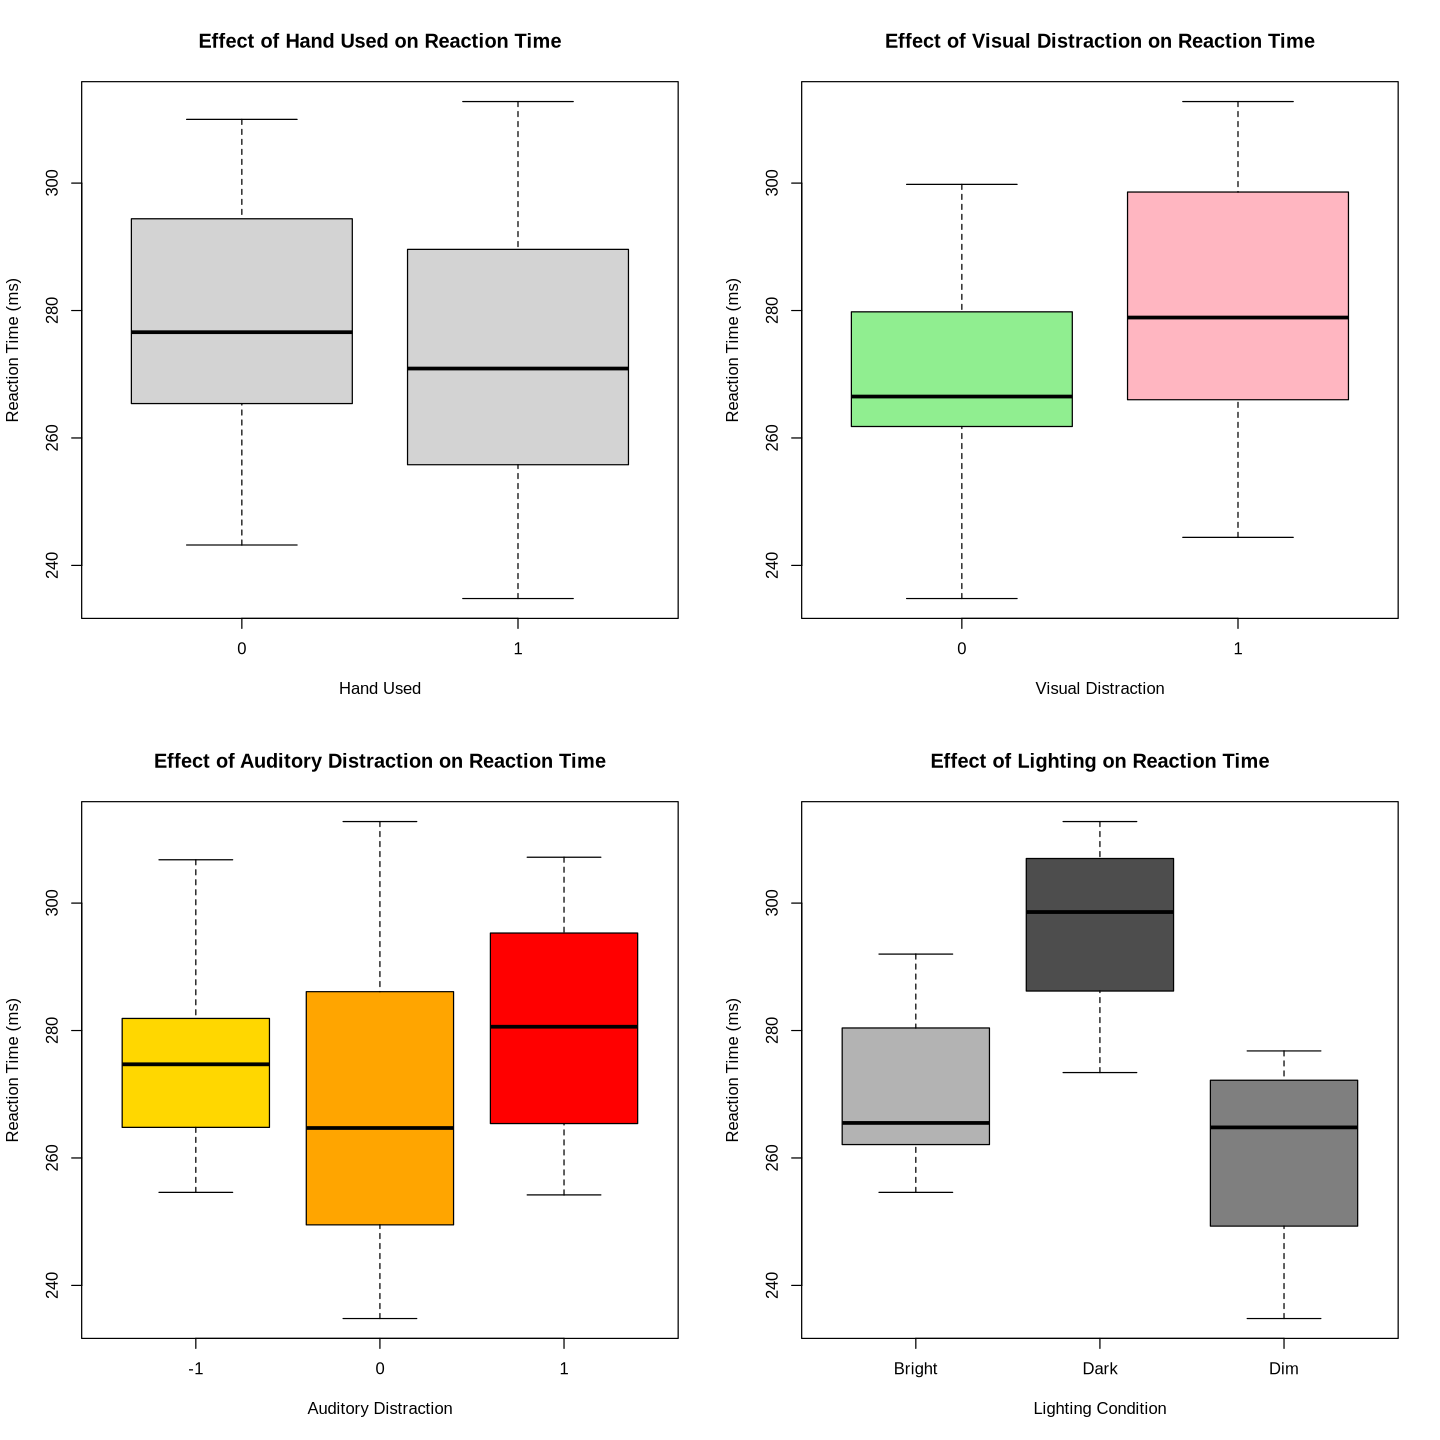

In [9]:
par(mfrow = c(2, 2))

boxplot(average_time ~ Hand_Used, data = data, 
        main = "Effect of Hand Used on Reaction Time", 
        ylab = "Reaction Time (ms)", xlab = "Hand Used")

boxplot(average_time ~ Visual_Distraction, data = data, 
        main = "Effect of Visual Distraction on Reaction Time", 
        ylab = "Reaction Time (ms)", 
        xlab = "Visual Distraction",
        col = c("lightgreen", "lightpink"))

boxplot(average_time ~ Auditory_Distraction, data = data, 
        main = "Effect of Auditory Distraction on Reaction Time", 
        ylab = "Reaction Time (ms)", 
        xlab = "Auditory Distraction",
        col = c("gold", "orange", "red"))

boxplot(average_time ~ Lighting, data = data, 
        main = "Effect of Lighting on Reaction Time", 
        ylab = "Reaction Time (ms)", 
        xlab = "Lighting Condition",
        col = c("grey70", "grey30", "grey50"))



In [10]:
# install.packages("~/Desktop/faraway_1.0.8.zip", repos = NULL, type = "source")
# install.packages('faraway', repos='http://cran.us.r-project.org')
# library(faraway)

# install.packages("car")
# library(car)
# install.packages("qualityTools")


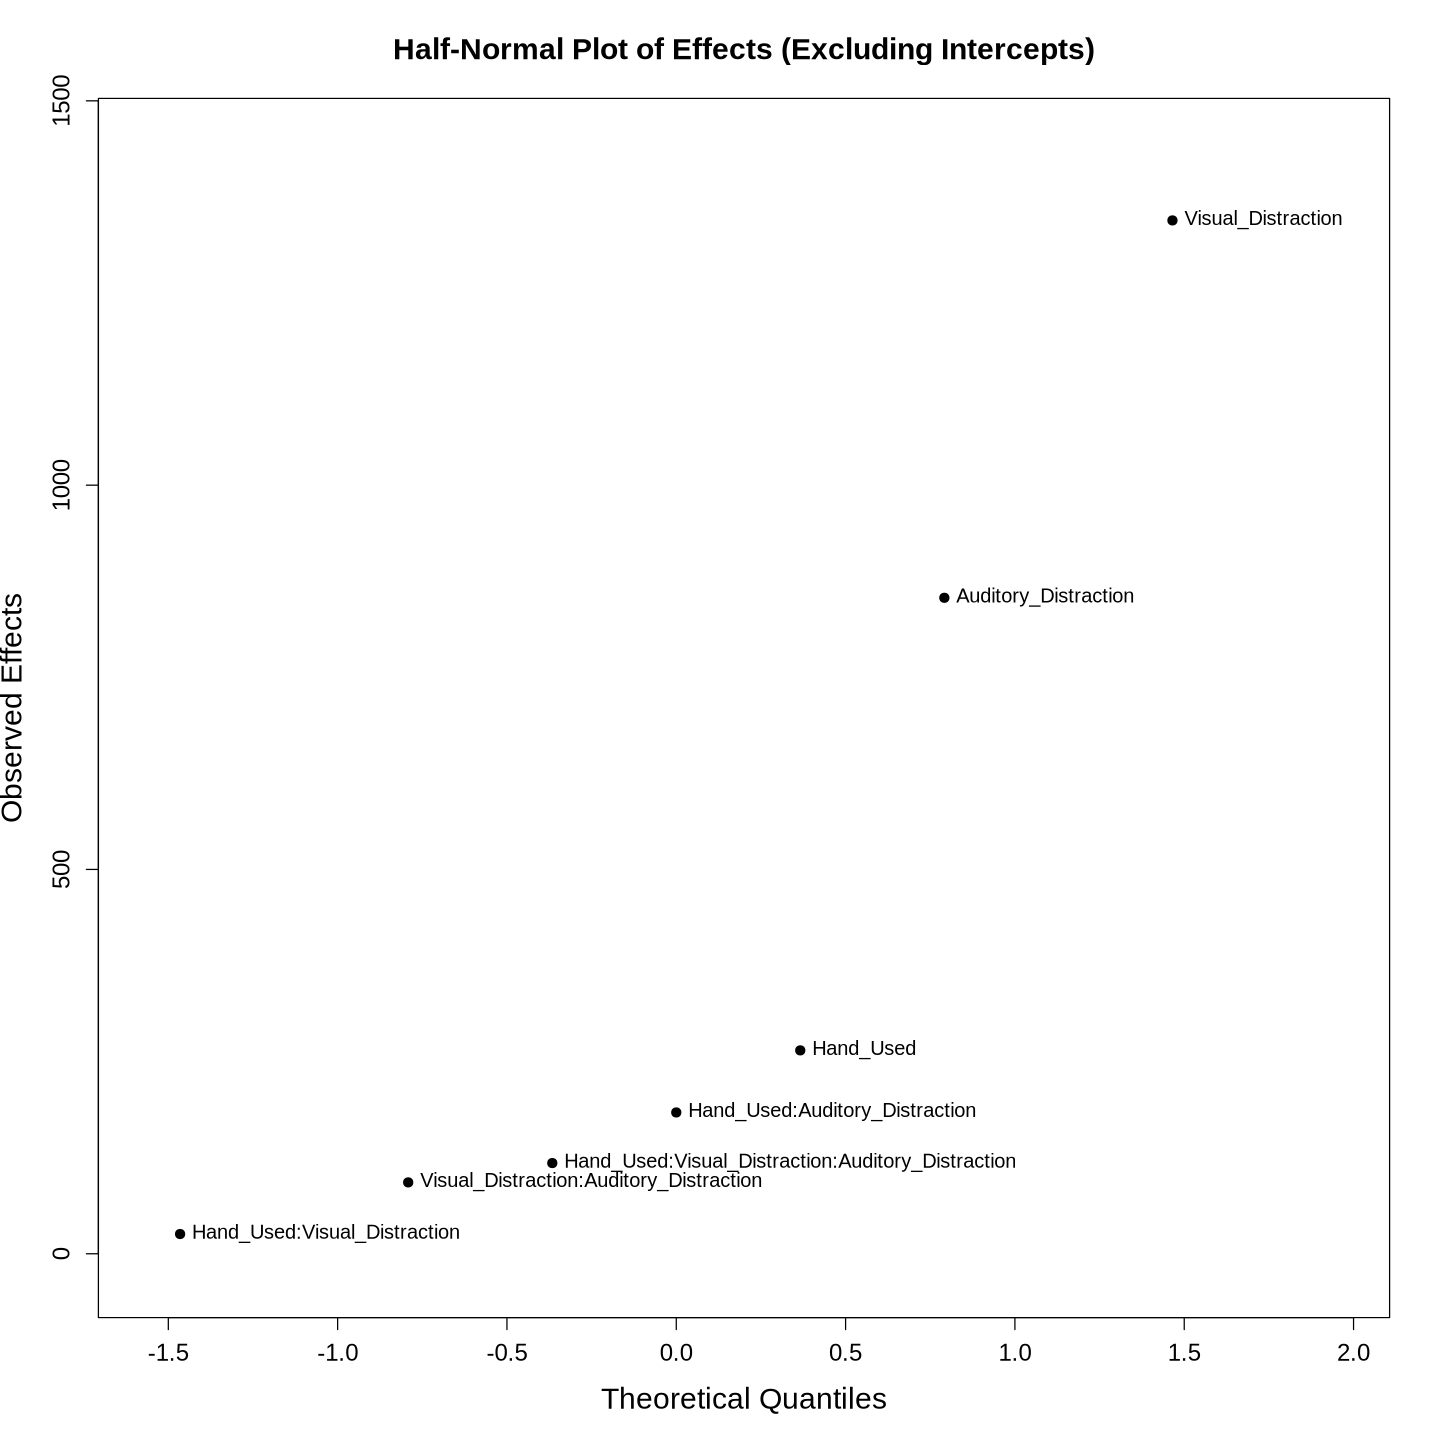

In [11]:
anova_table <- summary(anova_model)[[1]]
effects <- anova_table$`Sum Sq`[-c(1, nrow(anova_table))] 
names(effects) <- rownames(anova_table)[-c(1, nrow(anova_table))]

sorted_effects <- sort(abs(effects))
labels <- names(sorted_effects)

n <- length(sorted_effects)
theoretical_quantiles <- qnorm((1:n - 0.5) / n, mean = 0, sd = 1)

plot(
  theoretical_quantiles, sorted_effects,
  xlab = "Theoretical Quantiles",
  ylab = "Observed Effects",
  main = "Half-Normal Plot of Effects (Excluding Intercepts)",
  pch = 19,
  xlim = range(theoretical_quantiles) + c(-0.1, 0.5),  # Expand x-axis range
  ylim = range(sorted_effects) + c(-50, 100),         # Expand y-axis range
  cex.lab = 1.5,
  cex.axis = 1.2,
  cex.main = 1.5)

text(
  theoretical_quantiles, sorted_effects,
  labels = labels, pos = 4, cex = 1,   # Adjust text size (cex) here
  offset = 0.5)                        # Add space between points and labels



### Estimation with best treatment levels and confidence interval

In [12]:
# recommended levels for optimal average reaction speed
new_data <- data.frame(
  Lighting = factor('Dim'),  
  Hand_Used = factor(1), 
  Visual_Distraction = factor(0), 
  Auditory_Distraction = factor(0)
)

# estimated response given the recommended, with SE
predictions <- predict(anova_model, newdata = new_data, se.fit=TRUE)
predictions

# dof for prediction
df <- df.residual(anova_model)

# 95% confidence interval for estimated response
t_critical <- qt(0.975, df) 
lower_bound <- predictions$fit - t_critical * predictions$se.fit
upper_bound <- predictions$fit + t_critical * predictions$se.fit

confidence_interval <- c(lower_bound, upper_bound)
confidence_interval

$fit
    1 
241.1 

$se.fit
[1] 6.892

$df
[1] 22

$residual.scale
[1] 11.05

1     1 
226.8 255.4